Analyzing the Correlation of Gross Revenue with Key Variables

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6) # adjust the Configuration of Plots we create
pd.set_option('display.max_rows',None)
plt.style.use('ggplot')

In [3]:
#import Dataset
data = pd.read_csv(r'C:\Users\Texon\Downloads\archive\movies.csv')

In [4]:
data.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# check for null values
for col in data.columns:
    perc_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, perc_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#checking Null Values
missing_filter = data.isnull().any(axis=1)

# Apply the filter to show only rows with missing values
rows_with_missing = data[missing_filter]
rows_with_missing.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0


In [7]:
#Checking Infos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
#drop values rows with null values in budget and gross
data= data.dropna(subset=['budget','gross'])

In [9]:
#Filling missing Values in from the following columns
data['rating'] = data['rating'].fillna('PG')
data['country']= data['country'].fillna('unknown')
data['runtime']= data['runtime'].fillna(data['runtime'].mean())
data['company']= data['company'].fillna('unknown')


In [10]:
# check for duplicates
data.duplicated().sum()
data.sort_values('budget', ascending = False).head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0


In [11]:
# Converting Budget and gross Revenue in Millions
data['budget'] = data['budget']/1000000
data['gross'] = data['gross']/1000000

In [12]:
# Changing float to int 

data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')
data['runtime'] = data['runtime'].astype('float')



In [13]:
# Budget should have High Co relation with Gross Revenue
# Companies should Also have High Co relation

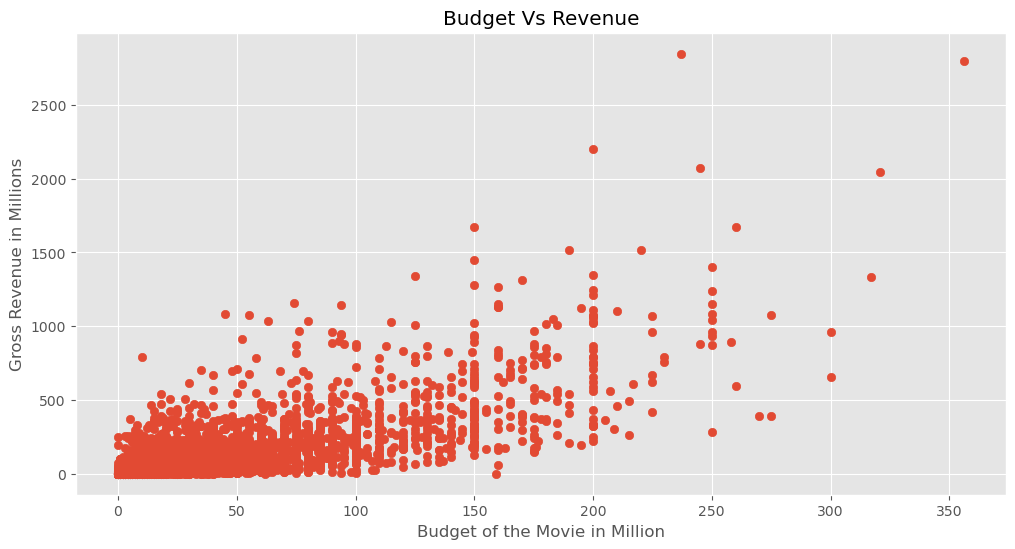

In [14]:
# Visualizing a scatterplot of Budget vs Revenue Relation
plt.scatter(x=data['budget'],y=data['gross'])
plt.title('Budget Vs Revenue')
plt.xlabel('Budget of the Movie in Million')
plt.ylabel('Gross Revenue in Millions')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

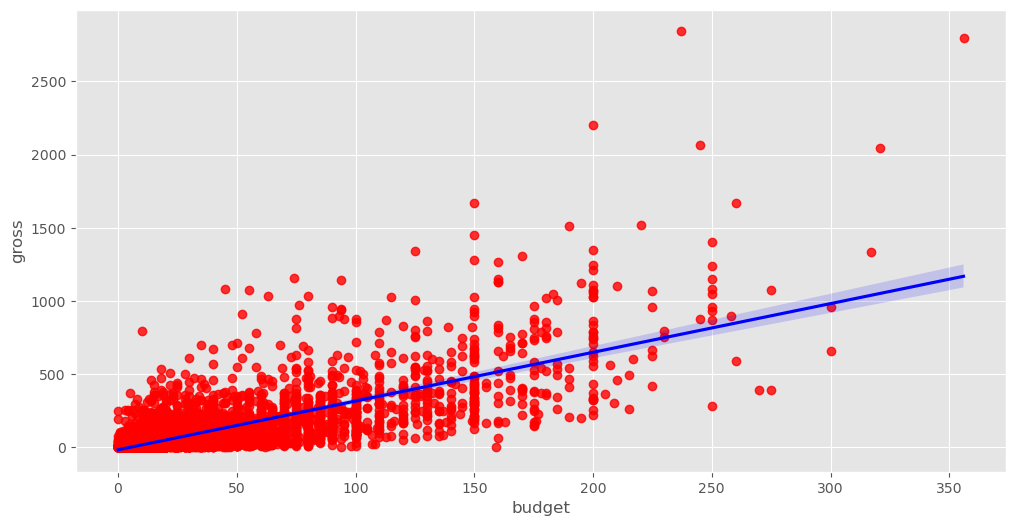

In [15]:
#checking Co Relation Using Regplot

sns.regplot(x='budget',y='gross', data=data, scatter_kws={'color':'red'}, line_kws= {'color':'blue'})
plt.show

In [16]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327943,0.274221,0.074196
score,0.055174,1.000000,0.473809,0.071480,0.222139,0.414530
votes,0.205758,0.473809,1.000000,0.439977,0.614875,0.352432
budget,0.327943,0.071480,0.439977,1.000000,0.740226,0.318731
gross,0.274221,0.222139,0.614875,0.740226,1.000000,0.275595
runtime,0.074196,0.414530,0.352432,0.318731,0.275595,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

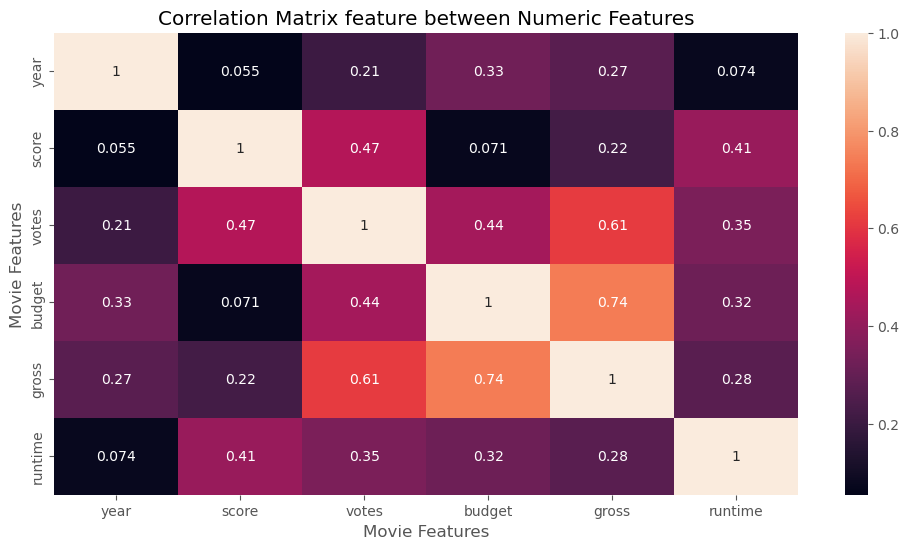

In [17]:
# plotting heatmap for to display the co relation between numeric variables
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix feature between Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [18]:
# Numerize All Columns
numerized_data = data
mappings = {}
for col in numerized_data.columns:
    if (numerized_data[col].dtype == 'object'):
        numerized_data[col] = numerized_data[col].astype('category')
        mappings[col] = dict(enumerate(numerized_data[col].cat.categories))  # Store the mapping
        numerized_data[col]= numerized_data[col].cat.codes
with open('column_mappings.json', 'w') as json_file:
    json.dump(mappings, json_file, indent=4)

print("Mappings saved to column_mappings.json")

Mappings saved to column_mappings.json


In [19]:
# Getting Co Relation 
correlation_matrix2 = numerized_data.corr()

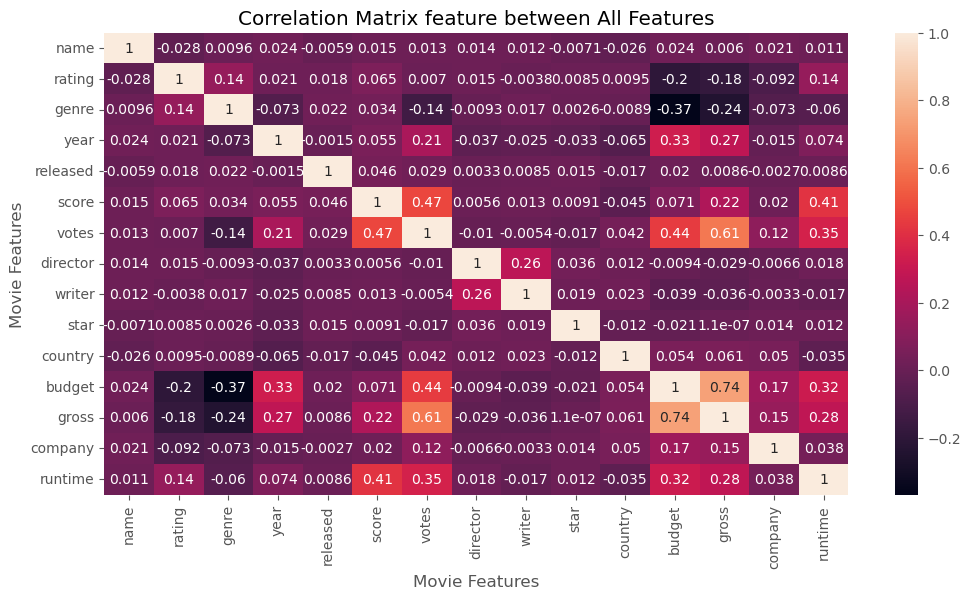

In [20]:
sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation Matrix feature between All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
# SO we got to know that gross revenue have high correlation budget
# so do the Votes.
# on the other hand company name which we expected does not have that much correlation

In [22]:
corr_pair = correlation_matrix2.unstack()
corr_pair.head(10)

name  name        1.000000
      rating     -0.028167
      genre       0.009617
      year        0.024435
      released   -0.005896
      score       0.014955
      votes       0.012915
      director    0.013699
      writer      0.011602
      star       -0.007109
dtype: float64

In [23]:
sorted_pairs = corr_pair.sort_values()
sorted_pairs.head(10)

budget  genre    -0.369131
genre   budget   -0.369131
gross   genre    -0.244392
genre   gross    -0.244392
budget  rating   -0.201522
rating  budget   -0.201522
        gross    -0.180105
gross   rating   -0.180105
genre   votes    -0.136457
votes   genre    -0.136457
dtype: float64

In [24]:
# Pairs with High Co Relation
sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs != 1)]

gross   votes     0.614875
votes   gross     0.614875
gross   budget    0.740226
budget  gross     0.740226
dtype: float64